# Erasmus Neural Networks
http://michalbereta.pl/nn
## Widrow-Hoff rule of learning


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### Linear regression

In regression problems, the required output of the model is a numeric value.

In the following example, we generate a data from one dimensional problem, i.e., there is just one input (x axis). The output value is numerical (y axis).

The values of `a` and `b` in 

`y = ax + b` 

are the (unknown to us) parameters of some phenomenon.

Usually, the training data we have is in some way 'noisy' (for example, due to the measurement errors). Nevertheless, we want to estimate the real values of `a` and `b`.

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


<IPython.core.display.Javascript object>


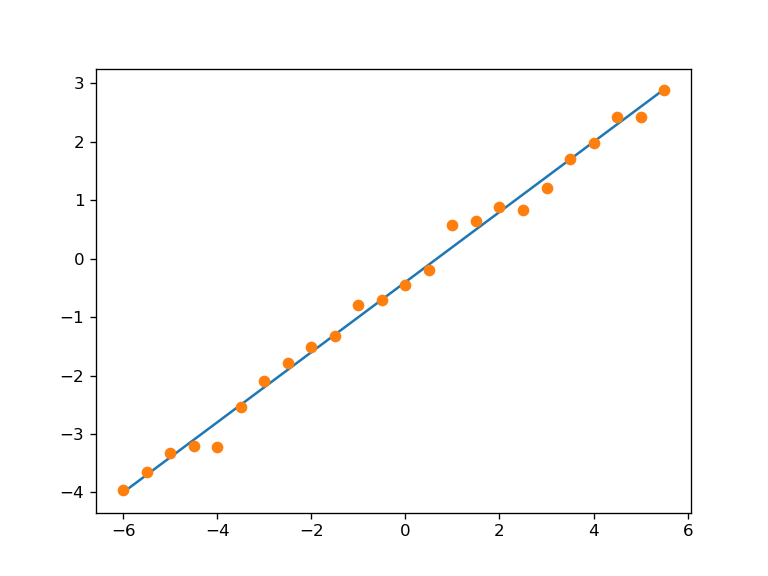

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation



xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma
#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

plt.show()

### Linear regression - estimating parameters of a linear model in one step with MSE minimization

In the following example, the parameters `a` and `b` are estimated in one step. 

There is no iterative learning here!

x= [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


<IPython.core.display.Javascript object>


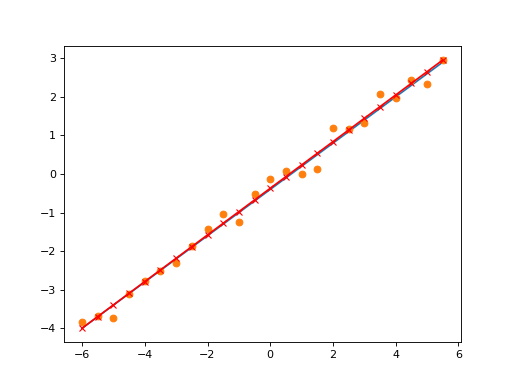

X= [[-6.   1. ]
 [-5.5  1. ]
 [-5.   1. ]
 [-4.5  1. ]
 [-4.   1. ]
 [-3.5  1. ]
 [-3.   1. ]
 [-2.5  1. ]
 [-2.   1. ]
 [-1.5  1. ]
 [-1.   1. ]
 [-0.5  1. ]
 [ 0.   1. ]
 [ 0.5  1. ]
 [ 1.   1. ]
 [ 1.5  1. ]
 [ 2.   1. ]
 [ 2.5  1. ]
 [ 3.   1. ]
 [ 3.5  1. ]
 [ 4.   1. ]
 [ 4.5  1. ]
 [ 5.   1. ]
 [ 5.5  1. ]]
(24, 2)
w= [ 0.60471539 -0.36944414]
training mse =  0.9704335813680676
testing mse =  0.04630353822221707


<IPython.core.display.Javascript object>


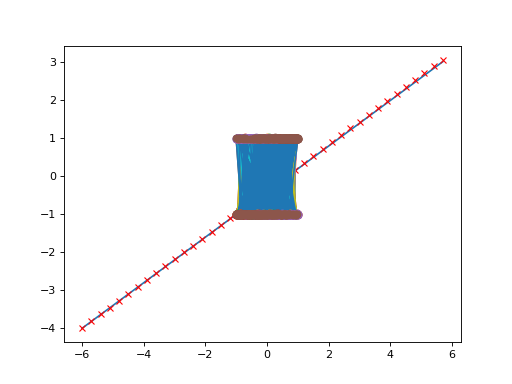

In [7]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

xmin = -6
xmax = 6
#ymin = -6
#ymax = 6

x = np.arange(xmin, xmax, 0.5)
print ('x=',x)

#real values of unknown process
a = 0.6
b = -0.4
d = a*x + b

#training data with noise (e.g., measurement errors)
sigma = 0.2
tr_d = d + np.random.randn(len(d)) * sigma

#plt.xlim(xmin,xmax)
#plt.ylim(ymin,ymax)

plt.plot(x, d)
plt.plot(x, tr_d, 'o')

#we add the column with "1" values directly here - not efficient in general
X = np.vstack((x, np.ones(len(tr_d)))).T
print('X=',X)
print(X.shape)

#weights for the neuron - there is no iterative process here!
w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), tr_d)
print('w=', w)

#neuron responses
y = w[0]*x + w[1]
plt.plot(x, y, 'r')
plt.plot(x, y, 'rx')

#training error
tr_mse = np.dot((y - tr_d).T, (y - tr_d))
print('training mse = ', tr_mse)

#sample some new points as test data
x_test = np.arange(xmin, xmax, 0.3)
d_test = a*x_test + b
y_test = w[0]*x_test + w[1]
test_mse = np.dot((y_test - d_test).T, (y_test - d_test))
print('testing mse = ', test_mse)

plt.figure()
plt.plot(x_test, d_test)
plt.plot(x_test, y_test,'rx')

plt.show()

### Perceptron training with Widrow-Hoff rule (online version) for classification problems (two classes)

In the following example we optimize the perceptron weights with Widrow-Hoff rule. MSE is minimized during the process.

The two classes are ancode numerically as `1` and `-1`.

#### DO NOT USE THIS CODE AS A TEMPLATE FOR YOUR IMPLEMENTATIONS!

In [2]:

import numpy as np
import pandas as pd

# Importing the dataset
import numpy as np

dataset = pd.read_csv('data5D_train.csv', header=None, delimiter=r"\s+")
x = dataset.iloc[:, :-1].values
xnp = np.asarray(x)
dataset2 = pd.read_csv('data5D_test.csv', header=None, delimiter=r"\s+")
x_test = dataset2.iloc[:, :].values

file = open("output.csv", "w+")
file_train = open("output_train.csv", "w+")
y = dataset.iloc[:, 5].values  # becomes l in the function
#y = np.array([-1,-1,1,1,1])
ynp = np.asarray(y)
w0test = 0
# training

# training data with noise (e.g., measurement errors)
sigma = 0.2


def perceptron_train(x, w, y):
   # w = np.zeros(len(X[0]))
    w0 = 0.1
    eta = 0.01
    epochs = 1000


    print(x[0])
    print(len(x[0]))
    #print("weights", w)

    for t in range(epochs):
        #errors = 0
        for i in range(0, len(x)):
            #print("nparray:",np.multiply(np.multiply(eta,(y[i] - np.dot(wT,x[i]))),x[i,:]))
            wT = w.transpose()
            arg = np.multiply(
                eta * (y[i] - np.dot(wT, x[i, :])), x[i, :])
            w = np.add(w, arg)
            #print("weights updated", w)
    print("weights updated", w)
    #w = np.sum(w,arg)


    # weights for the neuron - there is no iterative process here!
    w_batch = np.dot(np.dot(np.linalg.inv(np.dot(x.T, xnp)), x.T), y)
    print('w=', w_batch)
    print("this is w0:",w[0])
    # training error
    ans = np.dot(x, w[:]) + w[0]
    #mean squared error
    mse = np.sqrt(((ans - y) * (ans - y)).sum())
    #tr_mse = np.dot((y - tr_d).T, (y - tr_d))
    print('training mse = ', mse)
    #w= np.sum(w, np.multiply(np.multiply(eta,(y[i] - np.dot(wT,x[i]))),x[i,:]))
    # print(w.dtype)
    #print("weight", w)
    # Checking for errors

    return w


'''
###fake online iterative mode
    for t in range(epochs):
        #errors = 0
        for i in range(0, len(X)):
            for j in range(0, len(w)):
                w= np.sum(w, np.multiply(np.multiply(eta,(y[i] - np.dot(wT,x[i])),x[i][j])))
    for j in range(0,len(w)):
        print("weight", w[j])
'''
# print(errors)

# if(errors == 0):
#    break
#w0test = w0


w = np.random.rand(len(x[0]))
print("Weights: ", w)
w = perceptron_train(xnp, w, ynp)


print("This is w0: ", w0test)


def perceptron_test(x_test, w, w0):
    print(len(x_test))
    for i in range(0, len(x)):
        f = np.dot(x[i], w) + w0  # dot product2
        # f = np.dot(x[i], w)+w0 dot product2

        # activation function
        if f > 0:
            y = 1
            #w0 += eta*y
            # print(str(y))
            file.write("Label "+str(y) + "\n")
        else:
            y = -1
            #w0 += eta*y
            # print(str(y))
            file.write("Label "+str(y) + "\n")
    return f


print("Testing...")

perceptron_test(x_test, w, w0test)
print("...Test Ended")
file.close()
file_train.close()


Weights:  [0.67334686 0.32880175 0.97084072 0.7323634  0.54768049]
[-0.45219426  0.25657125 -0.9368542   0.80657558 -0.79133903]
5
weights updated [ 0.13816117 -0.17781482  0.15346298 -1.12421397  0.78770757]
w= [ 0.11876804 -0.19672351  0.13926761 -1.12193351  0.76688687]
this is w0: 0.13816117128645403
training mse =  13.552305500446213
This is w0:  0
Testing...
492
...Test Ended


### Task 1

Prepare your own implementation of perceptron learning using Widrow-Hoff algorithm (for classification problems with two classes).

– Use the online or batch mode

– Be ready for any number of attributes (inputs to perceptron)

– Use matrix / vector notation from numpy, avoid unnecessary looping.


In [4]:
import numpy as np
import pandas as pd

# Importing the dataset
import numpy as np

dataset = pd.read_csv('data5D_train.csv', header=None, delimiter=r"\s+")
x = dataset.iloc[:, :-1].values
xnp = np.asarray(x)
dataset2 = pd.read_csv('data5D_test.csv', header=None, delimiter=r"\s+")
x_test = dataset2.iloc[:, :].values
file = open("output.csv", "w+")
#file_train = open("output_train.csv", "w+")
y = dataset.iloc[:, 5].values  # becomes l in the function
#y = np.array([-1,-1,1,1,1])
ynp = np.asarray(y)
w0test = 0.1
# training

# training data with noise (e.g., measurement errors)
#sigma = 0.2
ones = np.ones(len(x[0]))

def perceptron_train(x, w, y):
   # w = np.zeros(len(X[0]))
    eta = 0.1
    epochs = 100


    print(x[0])
    print(len(x[0]))
    #print("weights", w)

    for t in range(epochs):
        #errors = 0
        for i in range(0, len(x)):
            #print("nparray:",np.multiply(np.multiply(eta,(y[i] - np.dot(wT,x[i]))),x[i,:]))
            wT = w[1:].transpose()
            upd = np.multiply(eta *(y[i] - np.dot(wT, x[i, :])), x[i, :])
            w[1:] = np.add(w[1:], upd)
            w[0] += eta*(y[i] - (np.dot(wT,ones)+w[0]))
            #print("weights updated", w)
    ans = (np.dot(x, w[1:]) + w[0])
        #w = np.sum(w,arg)

    #mse = np.sqrt((np.subtract(ans,y) * np.subtract(ans,y)).sum())
    mse = np.sqrt(np.dot(np.subtract(ans,y),np.subtract(ans,y)))
    # online
    print('weights in online mode=', w)

    print("this is w0:",w[0])

    print('mse online mode = ', mse)


    return w





w = np.random.rand(len(x[0])+1)
print("random Weights: ", w)
w = perceptron_train(xnp, w, ynp)







random Weights:  [0.05365385 0.89740664 0.52187805 0.17507011 0.25214576 0.9224167 ]
[-0.45219426  0.25657125 -0.9368542   0.80657558 -0.79133903]
5
weights in online mode= [-0.1255715   0.17878124 -0.06383826 -0.00631074 -1.07571272  0.82785093]
this is w0: -0.1255714973933741
mse online mode =  12.253536808607794


### Task 2

Use the 5D data to train your perceptron based on examples from data5D_train.csv. Last column is the class label.

Generate answers (as 1 or -1) for data in data5D_test.csv and save them to a file.

As the output of the model is numerical, the final classification decision is as follow: for the neuron output signal >0 classify the input to the first class (lable 1), otherwise to the second (label -1).

In [3]:
import numpy as np
import pandas as pd

# Importing the dataset
import numpy as np

dataset = pd.read_csv('data5D_train.csv', header=None, delimiter=r"\s+")
x = dataset.iloc[:, :-1].values
xnp = np.asarray(x)
dataset2 = pd.read_csv('data5D_test.csv', header=None, delimiter=r"\s+")
x_test = dataset2.iloc[:, :].values

file = open("output.csv", "w+")

y = dataset.iloc[:, 5].values  # becomes l in the function
#y = np.array([-1,-1,1,1,1])
ynp = np.asarray(y)
w0test = 0.1
# training

# training data with noise (e.g., measurement errors)
#sigma = 0.2

ones = np.ones(len(x[0]))
def perceptron_train(x, w, y):
   # w = np.zeros(len(X[0]))
    eta = 0.1
    epochs = 100
    mse=0
    print(x[0])
    print(len(x[0]))
    #print("weights", w)
    d = np.zeros(len(y))
    for t in range(epochs):
        #errors = 0
        for i in range(0, len(x)):
            wT = w[1:].transpose()
            upd = np.multiply(eta *(y[i] - np.dot(wT, x[i, :])), x[i, :])
            w[1:] = np.add(w[1:], upd)
            w[0] += eta*(y[i] - (np.dot(wT,ones)+w[0]))
            ans = (np.dot(x, w[1:]) + w[0])
                #print("weights updated", w)
            mse = np.sqrt(np.dot(np.subtract(ans,y),np.subtract(ans,y)))
            #w = np.sum(w,arg)

    #mse = np.sqrt((np.subtract(ans,y) * np.subtract(ans,y)).sum())

    # online
    print('weights in online mode=', w)

    print("this is w0:",w[0])

    print('mse online mode = ', mse)


    return w



# print(errors)

# if(errors == 0):
#    break



w = np.random.rand(len(x[0])+1)
print("random Weights: ", w)
w = perceptron_train(xnp, w, ynp)




#print("This is w0: ", w0test)

def perceptron_test(x, w, w0):
    print(len(x_test))
    for i in range(0, len(x)):
        f = np.dot(x[i], w[1:]) + w[0]  # dot product2
        # f = np.dot(x[i], w)+w0 dot product2

        # activation function
        if f > 0:
            y = 1
            #w0 += eta*y
            # print(str(y))
            file.write(str(y) + "\n")
        else:
            y = -1
            #w0 += eta*y
            # print(str(y))
            file.write(str(y) + "\n")
    return f
print("Testing...")
perceptron_test(x_test, w, w0test)
print("...Test Ended")

file.close()


random Weights:  [0.9609901  0.34164384 0.59708413 0.90201186 0.09910193 0.62968287]
[-0.45219426  0.25657125 -0.9368542   0.80657558 -0.79133903]
5
weights in online mode= [ 0.08897135  0.13816117 -0.17781482  0.15346298 -1.12421397  0.78770757]
this is w0: 0.0889713451523359
mse online mode =  13.085894686955086
Testing...
492
...Test Ended


### Task 3

Implement Widrow-Hoff online training (update of weights is done after each training example) for linear regression problem. Use the previous example as the starting point.

random Weights:  [-0.3208459   0.17878124 -0.06383826 -0.00631074 -1.07571272  0.82785093]
weights in online mode= [-0.3208459   0.17878124 -0.06383826 -0.00631074 -1.07571272  0.82785093]
this is w0: -0.45819240790856447
mse online mode =  0.9558509708244646


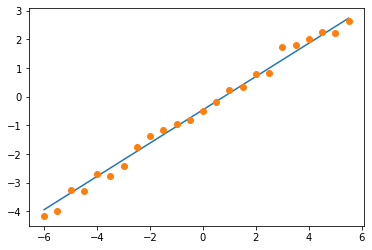

In [8]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
# Importing the dataset
import numpy as np

#dataset = pd.read_csv('data5D_train.csv', header=None, delimiter=r"\s+")
#x = dataset.iloc[:, :-1].values
#xnp = np.asarray(x)
#dataset2 = pd.read_csv('data5D_test.csv', header=None, delimiter=r"\s+")
#x_test = dataset2.iloc[:, :].values

file = open("output.csv", "w+")

#y = dataset.iloc[:, 5].values  # becomes l in the function
#y = np.array([-1,-1,1,1,1])
#ynp = np.asarray(y)
w0test = 0
# training

# training data with noise (e.g., measurement errors)
sigma = 0.2
a = 0.6
b = -0.4


xmin = -6
xmax = 6
#ymin = -6
#ymax = 6
xnp = np.arange(xmin, xmax, 0.5)
def perceptron_train(x,w):
   # w = np.zeros(len(X[0]))
    eta = 0.01
    epochs = 1000
    d= a*xnp+b
    sigma = 0.2
    w_zero=0
    w_one=0
    #tr_d = np.multiply(np.add(y,random.randint(0,len(y))),sigma)
    #print("weights", w)
    tr_d = d + np.random.randn(len(d)) * sigma

    for t in range(epochs):
        errors = 0
        for i in range(0, len(x)):
            d = w_one*x[i]+ w_zero
            delta = tr_d[i] - d
            if  (delta!=0):
            #print("nparray:",t.multiply(np.multiply(eta,(y[i] - np.dot(wT,x[i]))),x[i,:]))
                w_one+= eta*np.multiply(delta,x[i])
                w_zero+=eta*delta
                errors+=(delta)*(delta)
            #print("weights updated", w)

        #w = np.sum(w,arg)
    ans = w_one*x+w_zero
    mse = np.sqrt(errors)
    # online
    print('weights in online mode=', w)

    print("this is w0:",w_zero)

    print('mse online mode = ', mse)

    #training data with noise (e.g., measurement errors)

    #tr_d = y + np.random.randn(len(y)) * sigma
    plt.plot(xnp, ans)
    plt.plot(xnp, tr_d, 'o')
    plt.show()

    return w


'''
###fake online iterative mode
    for t in range(epochs):
        #errors = 0
        for i in range(0, len(X)):
            for j in range(0, len(w)):
                w= np.sum(w, np.multiply(np.multiply(eta,(y[i] - np.dot(wT,x[i])),x[i][j])))
    for j in range(0,len(w)):
        print("weight", w[j])
'''
# print(errors)

# if(errors == 0):
#    break
#w0test = w0


print("random Weights: ", w)
w = perceptron_train(xnp, w)
file.close()
